# Contents

### Import/Setup
### Dendrogram (1 Year) PCA
### Dendrogram (1 Decade) PCA
### PCA Cluster Analysis

# Import/Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
plt.rcParams["figure.dpi"] = 300
plt.style.use('fivethirtyeight')

In [3]:
path = r'C:\Users\rubix\Downloads\Machine Learning 2'

In [4]:
df_decade = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'PCA_decade.csv'), index_col = False)
df_year = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'PCA_year.csv'), index_col = False)

In [5]:
df_decade

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    -10.987090 -1.897855 -2.015814  0.772481 -1.845687 -0.025551  2.031271   
1    -11.353137  1.083328 -1.545188  2.928038 -1.839859 -0.084224  0.639622   
2    -12.484574  1.906529 -0.130687  1.177910 -3.614950 -0.818537  2.848494   
3    -12.511502 -0.812010  0.430613 -2.948175 -4.452077  0.498955  0.500549   
4    -10.780795 -2.733587  0.335114 -0.484834 -1.425911 -0.343929 -0.850246   
...         ...       ...       ...       ...       ...       ...       ...   
3648  -9.606839  0.285970  1.670340 -0.794416  3.637523 -2.373249  0.851792   
3649  -9.765861  1.891665  2.711977 -0.705047  1.049918 -3.383046  1.810337   
3650 -10.436084  2.840993  3.033914 -1.375901  1.223127 -2.213319  2.209947   
3651 -10.802744  2.439471  3.711317  0.034243  2.086652 -2.029797  1.611168   
3652 -10.701725  2.499550  3.613015 -0.214379  2.028409 -1.990413  2.546020   

          PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0     1.712743 -1.524892 -1.506804 -0.178211 -0.086582  0.303354 -1.542313   
1     1.914003 -0.568587 -2.616425 -1.438335 -0.197028  0.318219 -0.869307   
2     2.730205  1.995233 -0.445712 -0.436199 -1.140625  1.605025 -0.133919   
3    -0.334615  1.582296 -2.598932  3.200951 -0.316267  0.795489 -0.369044   
4     0.961496  0.797112 -0.469652  0.540539  0.693549  1.734958  1.648255   
...        ...       ...       ...       ...       ...       ...       ...   
3648 -0.224198 -2.411960  0.794999 -0.444869 -0.466652 -0.923622 -0.321921   
3649  0.171471 -2.027704 -0.677001 -1.352197 -0.147788 -1.166877 -0.999161   
3650  0.354245 -2.224006  0.020254 -1.486408 -0.453304 -1.470224 -0.357962   
3651  0.354278 -2.231624  1.019900 -1.129724  0.023927 -0.611111 -0.098781   
3652  0.465226 -2.257093  0.603673 -1.359959  0.458770 -1.847130 -0.296093   

         PCA15     PCA16     PCA17     PCA18  
0    -0.662888 -0.125709 -0.253107  0.370267  
1    -0.407211  0.349218 -0.222318  1.556964  
2    -0.678180  2.377236  1.214311  0.831257  
3    -1.140250  0.313948 -0.816639  0.779901  
4    -0.498999 -0.605430 -0.780587  0.451207  
...        ...       ...       ...       ...  
3648 -1.124347 -0.871926  1.438335 -0.797553  
3649 -0.654599  0.114828  1.226655  0.241206  
3650 -1.308083 -0.249640  2.015074 -0.180108  
3651  0.632260 -0.858623  1.023312 -0.537881  
3652  0.615483 -0.264053  0.374954 -1.032871  

[3653 rows x 18 columns]

In [6]:
df_year

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0   -10.175504  5.796703  4.840956 -0.533881 -1.263282 -1.303466  1.316296   
1    -9.946074  3.301700  4.633997  0.972885 -1.314600 -0.230724  0.836606   
2    -9.125498  1.415212  2.683864  1.513918 -2.362856  1.564328 -1.891633   
3    -9.352554  2.171591  2.233356 -2.905381 -5.455167  0.137960  0.009858   
4    -9.430517  4.251259  4.518482 -1.121733 -3.601303 -0.727218  3.183032   
..         ...       ...       ...       ...       ...       ...       ...   
361 -12.336166 -6.382893 -4.520092  6.233842  4.137606  2.228220  1.093113   
362 -10.938578 -8.856321 -7.920130 -0.858275  5.304123 -3.350494  3.617700   
363 -10.196290 -6.368311 -5.386224 -0.976117  3.892057 -2.913969  1.769870   
364 -10.012294 -3.701100 -2.309487 -1.596662  2.214536 -2.069187  1.920693   
365 -11.206425 -2.625554 -1.345583 -1.822126  3.377911 -3.021144  0.864102   

         PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0   -0.805944 -1.345935  2.077861  0.538245 -1.815304 -1.317909 -0.622141   
1   -0.009419 -1.137600  1.059614 -0.209322 -2.048104 -0.802563  0.712772   
2    0.542756 -0.434843  0.815968 -1.751206 -1.317034 -0.773641 -0.579585   
3   -0.001799 -0.356732 -0.727950 -1.554137 -1.290848 -0.027840  0.865293   
4    0.465669  0.192527  1.527337  1.118512 -0.870158  0.845076 -0.988931   
..        ...       ...       ...       ...       ...       ...       ...   
361  2.780984 -0.712217 -1.722489  0.539811 -0.303437 -0.601005  0.342097   
362  0.245181 -1.784367  0.257849 -0.845269 -2.087250 -0.881478  0.461176   
363 -1.218736 -1.312927 -1.726777 -1.128954 -0.955167 -0.622881  1.841458   
364 -0.457742  0.906770 -1.604984 -1.484707 -0.465790 -1.873770  0.469012   
365  0.864381 -1.177120 -1.436174  0.038705  1.131943 -2.080875 -0.214038   

        PCA15     PCA16     PCA17     PCA18  
0    0.557455  1.176169  1.135914 -0.355144  
1    1.521155  1.671743 -0.675864 -0.355365  
2    1.718032  0.488353 -1.653160 -1.656204  
3   -0.820487  0.312100 -0.953712 -0.980613  
4   -0.635351 -0.560727 -0.648948  1.144728  
..        ...       ...       ...       ...  
361  1.666801 -1.546852 -0.125936  0.507717  
362  1.691035 -0.625285 -0.458217  1.399936  
363  0.768279  0.581616 -1.344714  0.700412  
364  0.905354 -1.138835  0.079978 -1.201178  
365 -0.082673 -0.324384 -0.485975 -0.028639  

[366 rows x 18 columns]

# Dendrogram (1 Year)

## Single

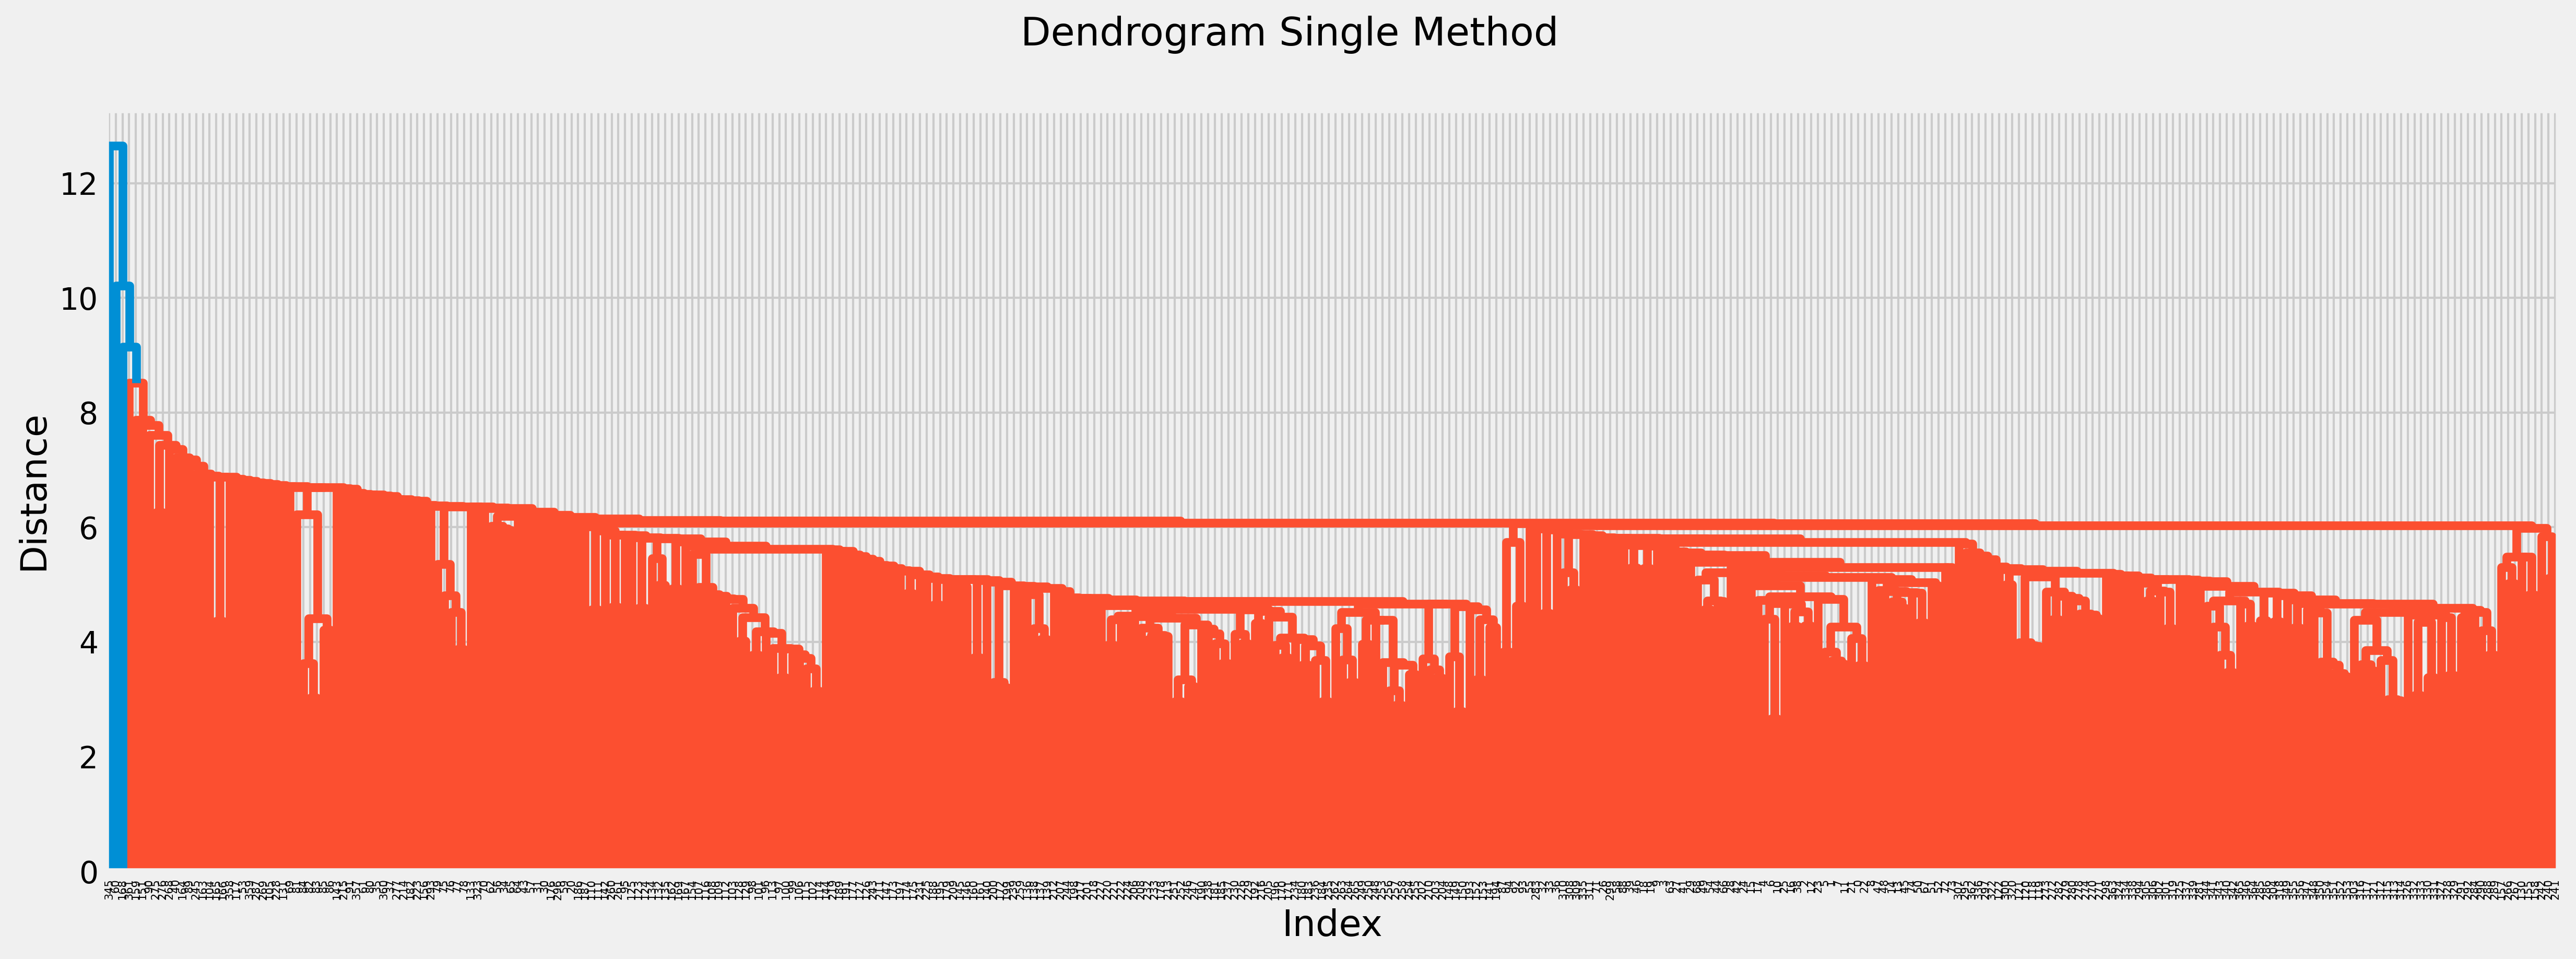

In [7]:
link = linkage(df_year, method="single")
plt.figure(figsize=(18,6))
dend_1_year_single = dendrogram(link, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reduced_dend_1_year_single.png'), bbox_inches='tight')
plt.show()

## Complete

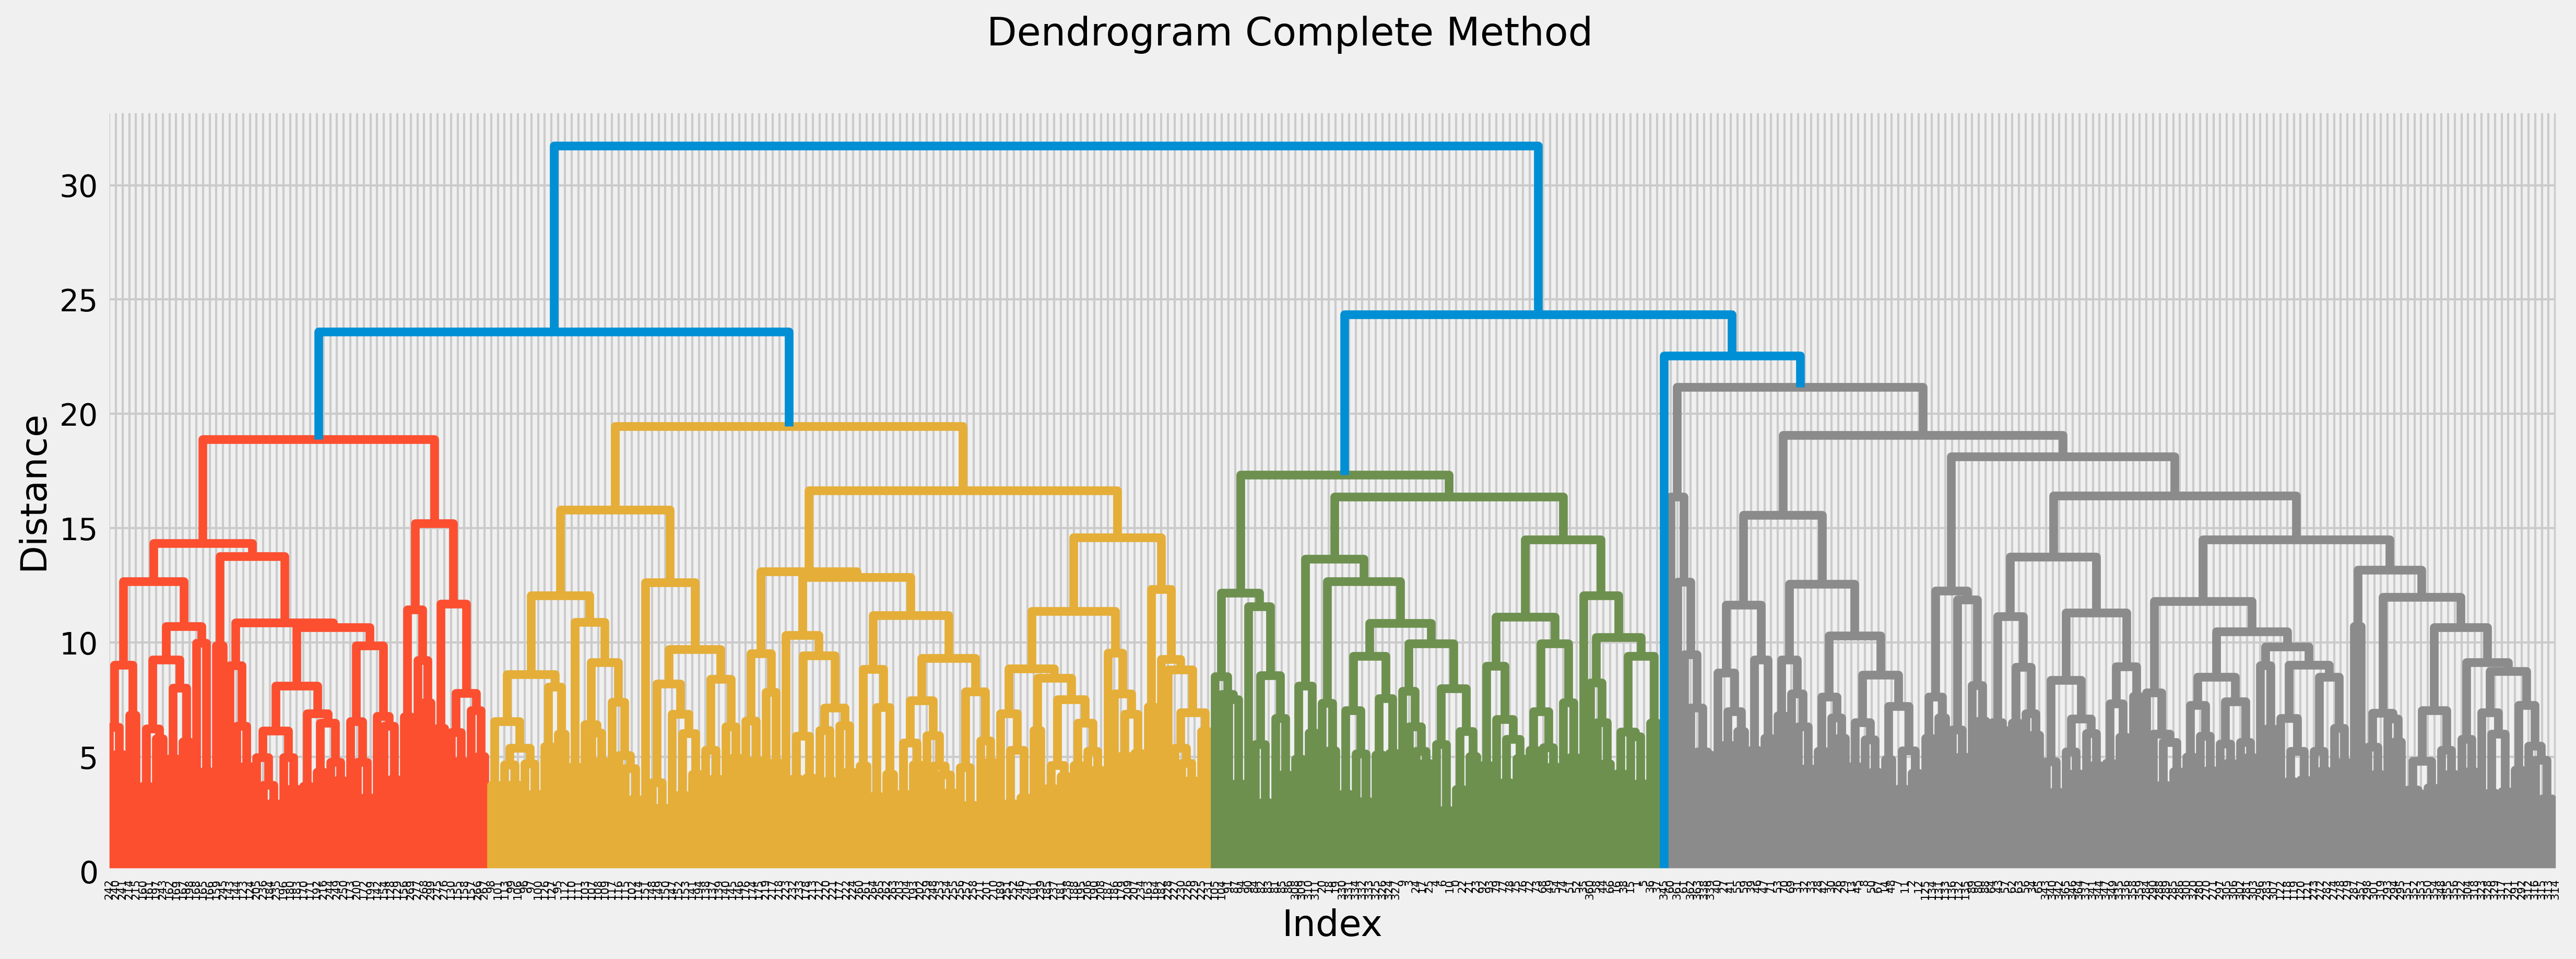

In [8]:
link = linkage(df_year, method="complete")
plt.figure(figsize=(18,6))
dend_1_year_complete = dendrogram(link, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reduced_dend_1_year_complete.png'), bbox_inches='tight')
plt.show()

## Average

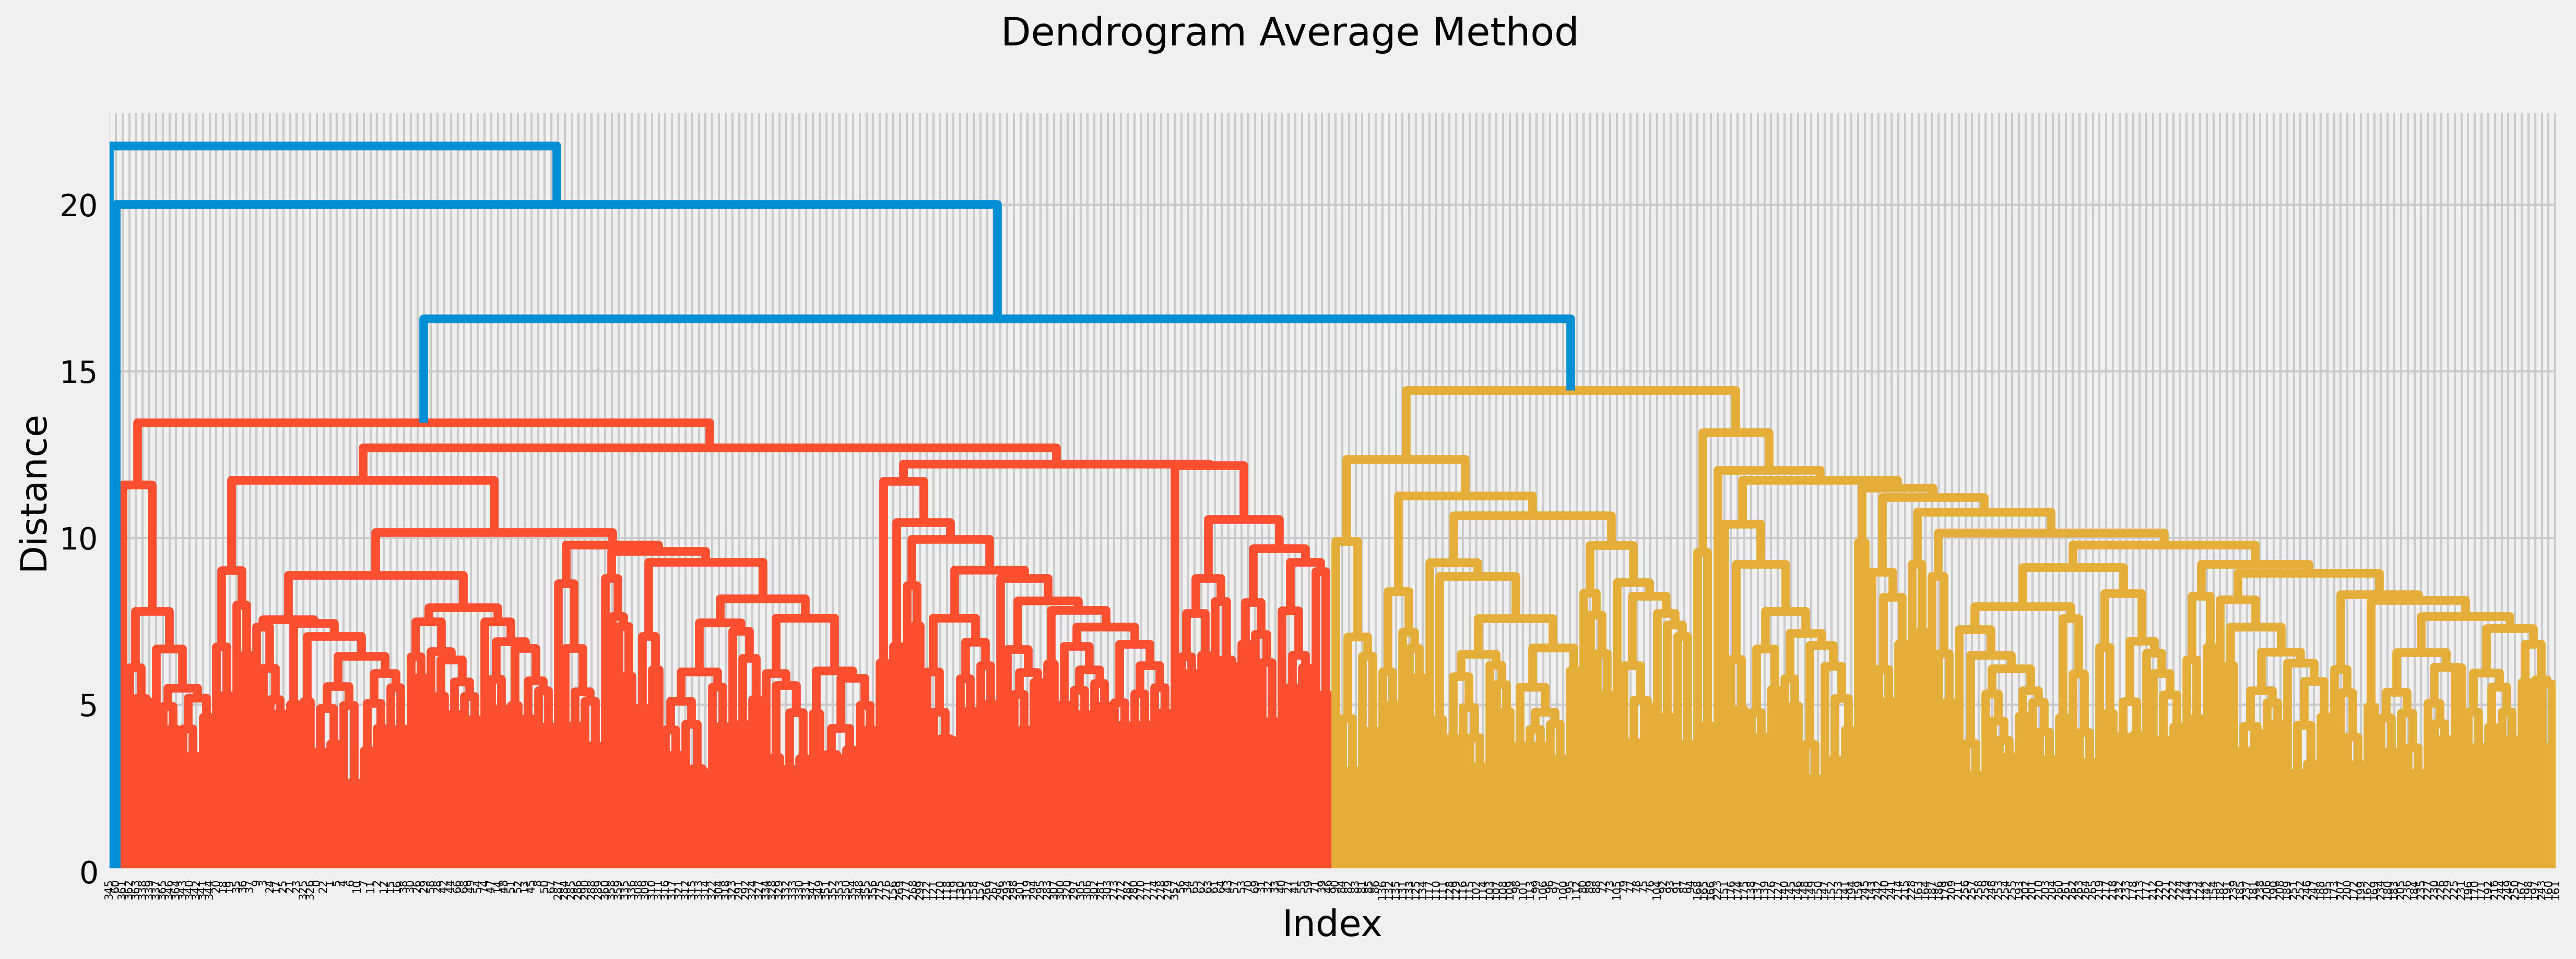

In [9]:
link = linkage(df_year, method="average")
plt.figure(figsize=(18,6))
dend_1_year_average = dendrogram(link, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reduced_dend_1_year_average.png'), bbox_inches='tight')
plt.show()

## Ward

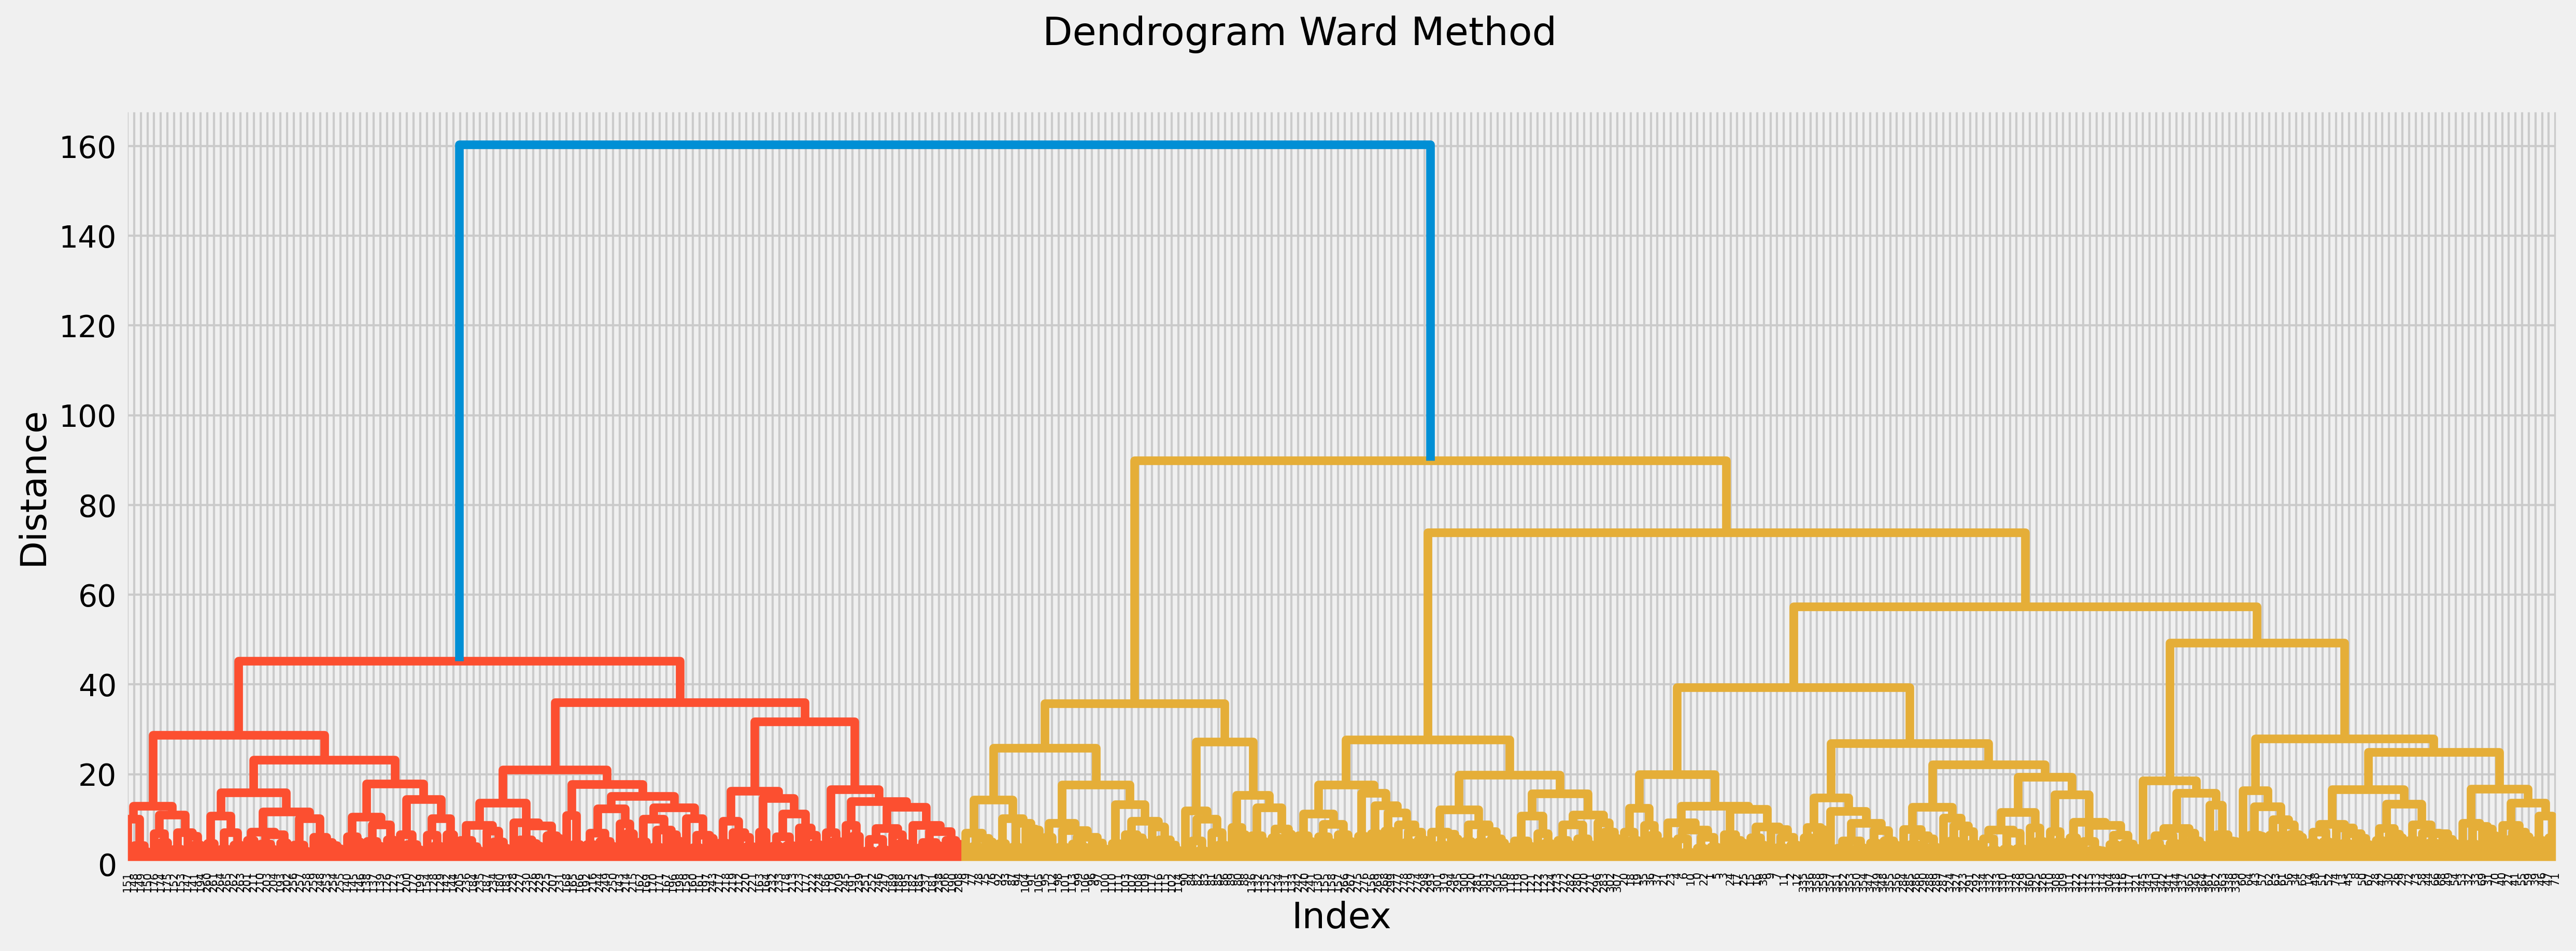

In [10]:
link = linkage(df_year, method="ward")
plt.figure(figsize=(18,6))
dend_1_year_ward = dendrogram(link, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method", fontsize=18)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reduced_dend_1_year_ward.png'), bbox_inches='tight')
plt.show()

# Dendrogram (1 Decade)

## Single

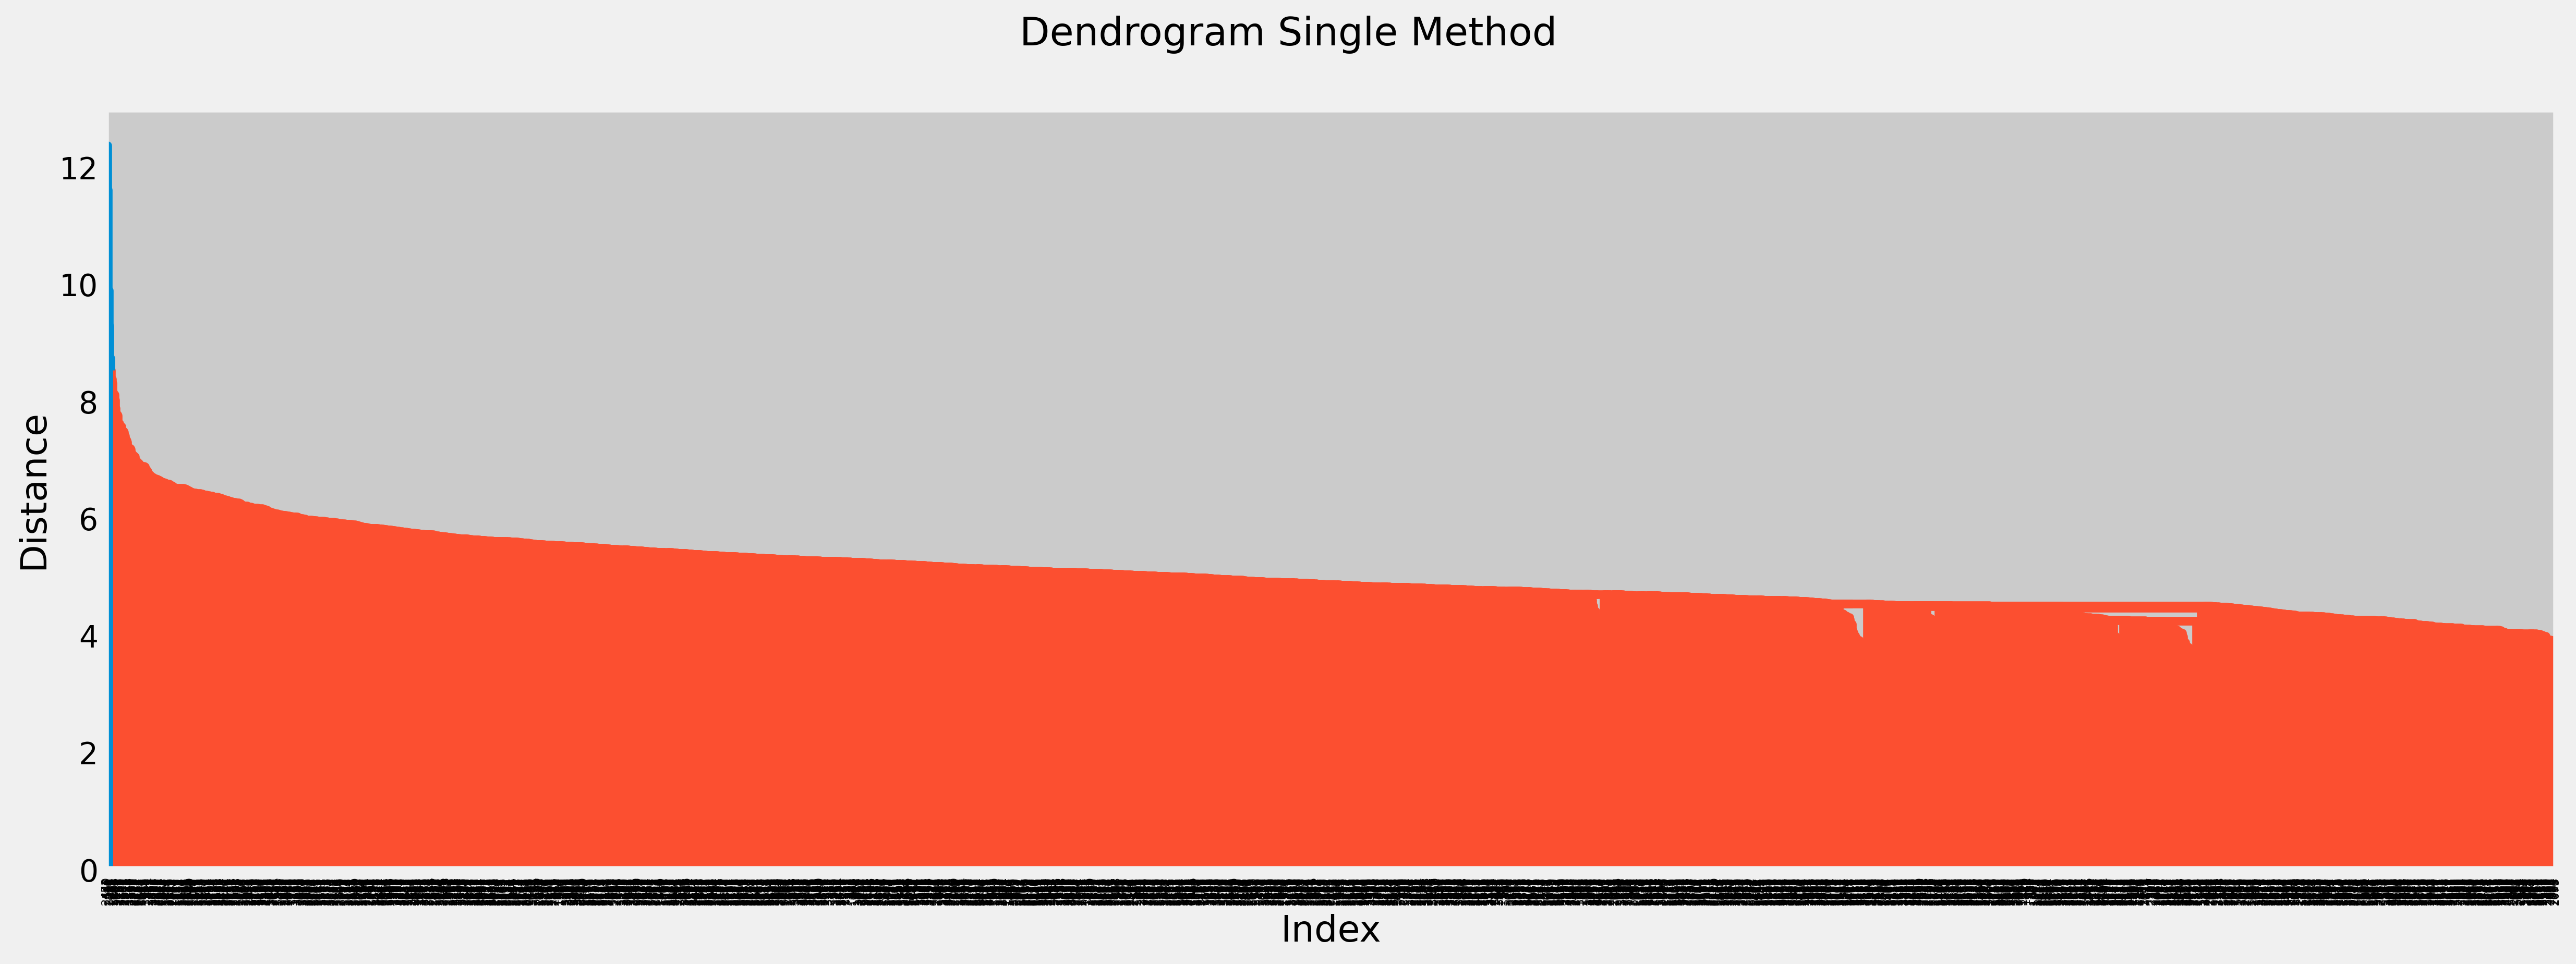

In [11]:
link = linkage(df_decade, method="single")
plt.figure(figsize=(18,6))
dend_1_decade_single = dendrogram(link, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reduced_dend_1_decade_single.png'), bbox_inches='tight')
plt.show()

## Complete

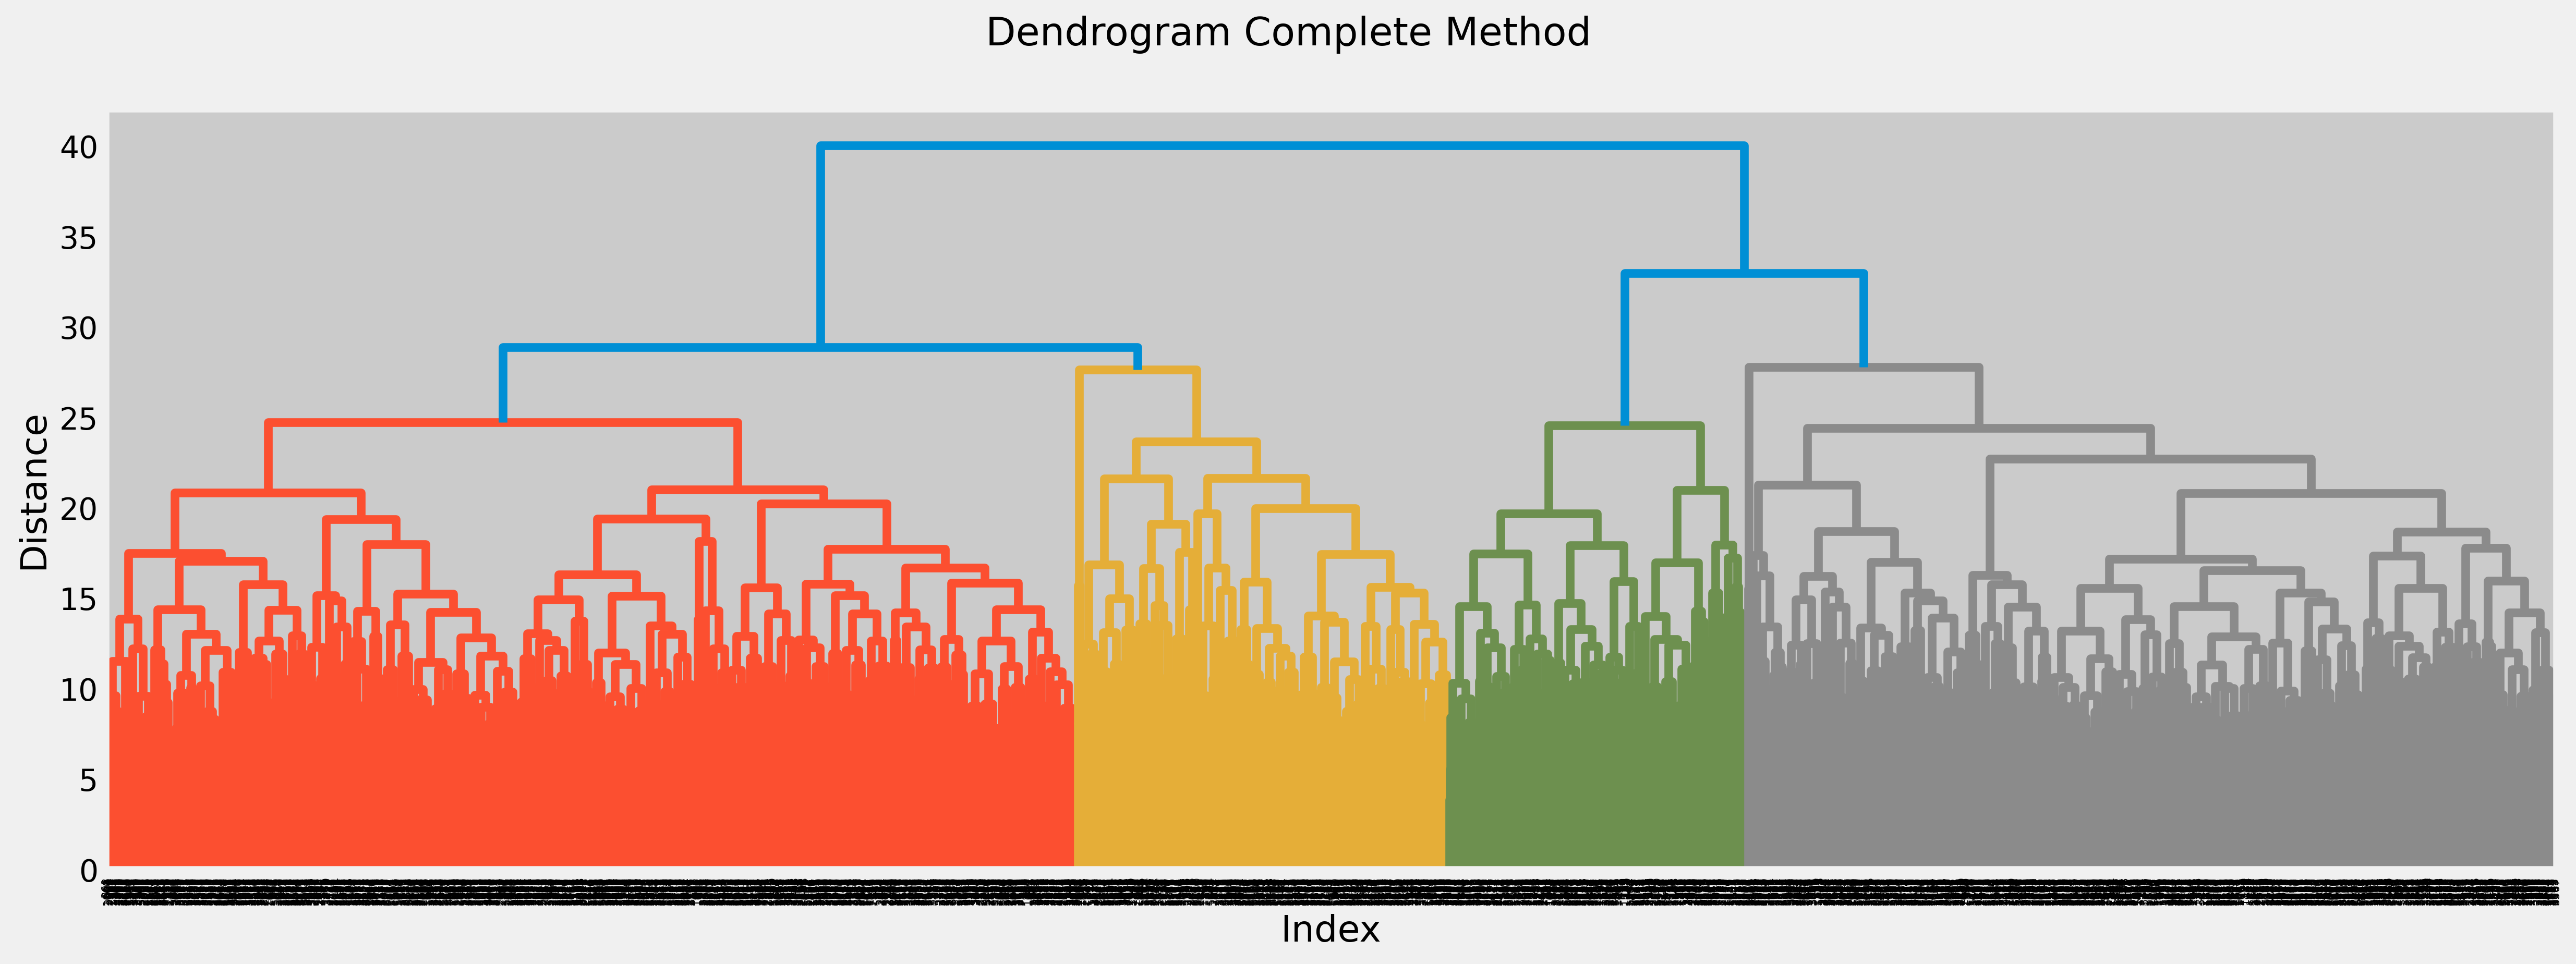

In [12]:
link = linkage(df_decade, method="complete")
plt.figure(figsize=(18,6))
dend_1_decade_complete = dendrogram(link, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reduced_dend_1_decade_complete.png'), bbox_inches='tight')
plt.show()

## Average

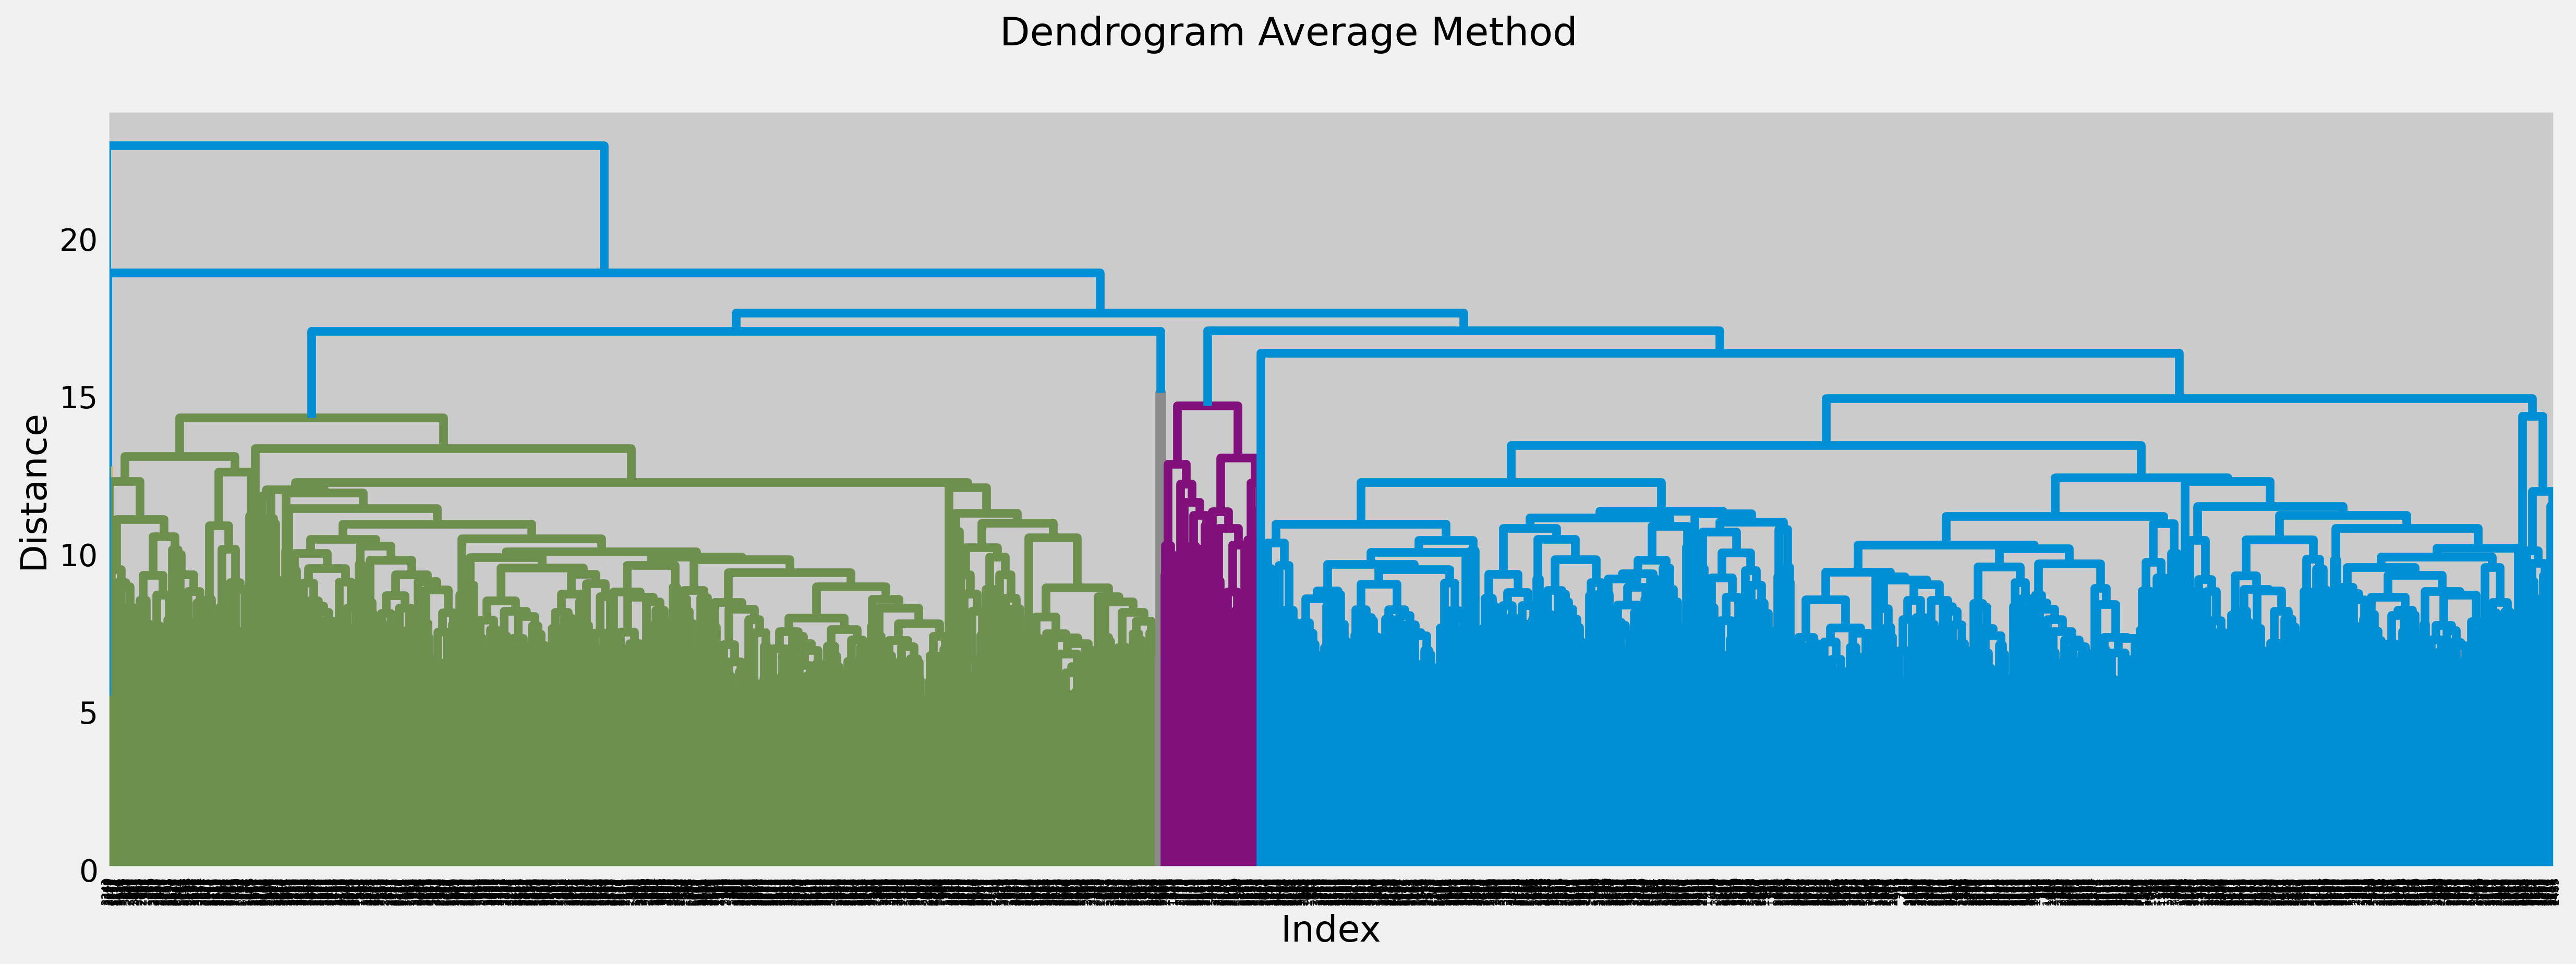

In [13]:
link = linkage(df_decade, method="average")
plt.figure(figsize=(18,6))
dend_1_decade_average = dendrogram(link, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reduced_dend_1_decade_average.png'), bbox_inches='tight')
plt.show()

## Ward

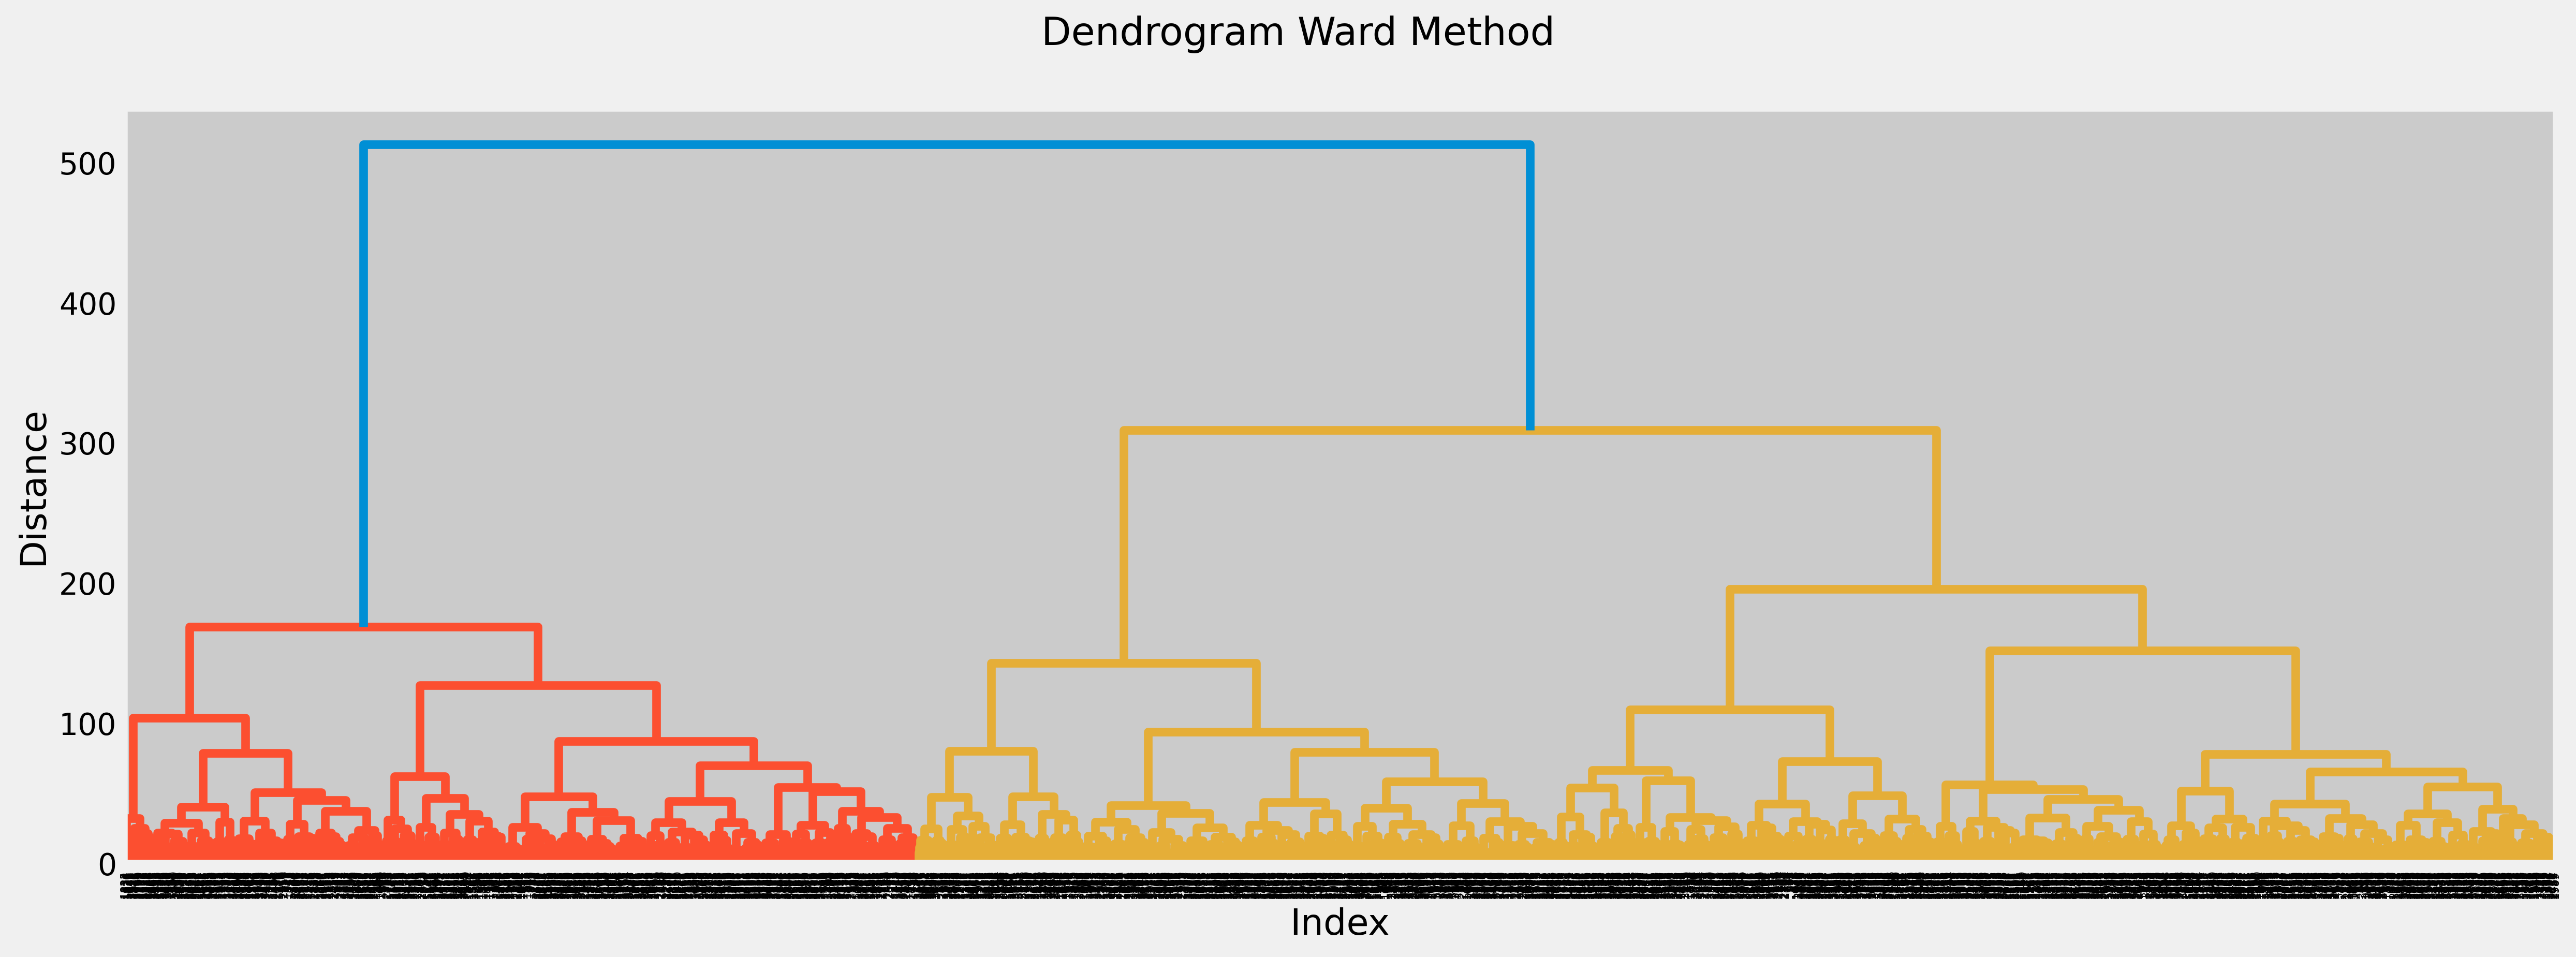

In [14]:
link = linkage(df_decade, method="ward")
plt.figure(figsize=(18,6))
dend_1_decade_ward = dendrogram(link, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reduced_dend_1_decade_ward.png'), bbox_inches='tight')
plt.show()

# PCA Cluster Analysis

C:\Users\rubix\AppData\Local\Temp\ipykernel_8708\538429317.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPCA_decade['clust2']=fcluster(link, 2, criterion='maxclust')
C:\Users\rubix\AppData\Local\Temp\ipykernel_8708\538429317.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPCA_decade["labels"] = pleasant_basel.values
C:\Users\rubix\AppData\Local\Temp\ipykernel_8708\538429317.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

<Axes: title={'center': 'Pleasant Weather'}, xlabel='PCA1', ylabel='PCA2'>

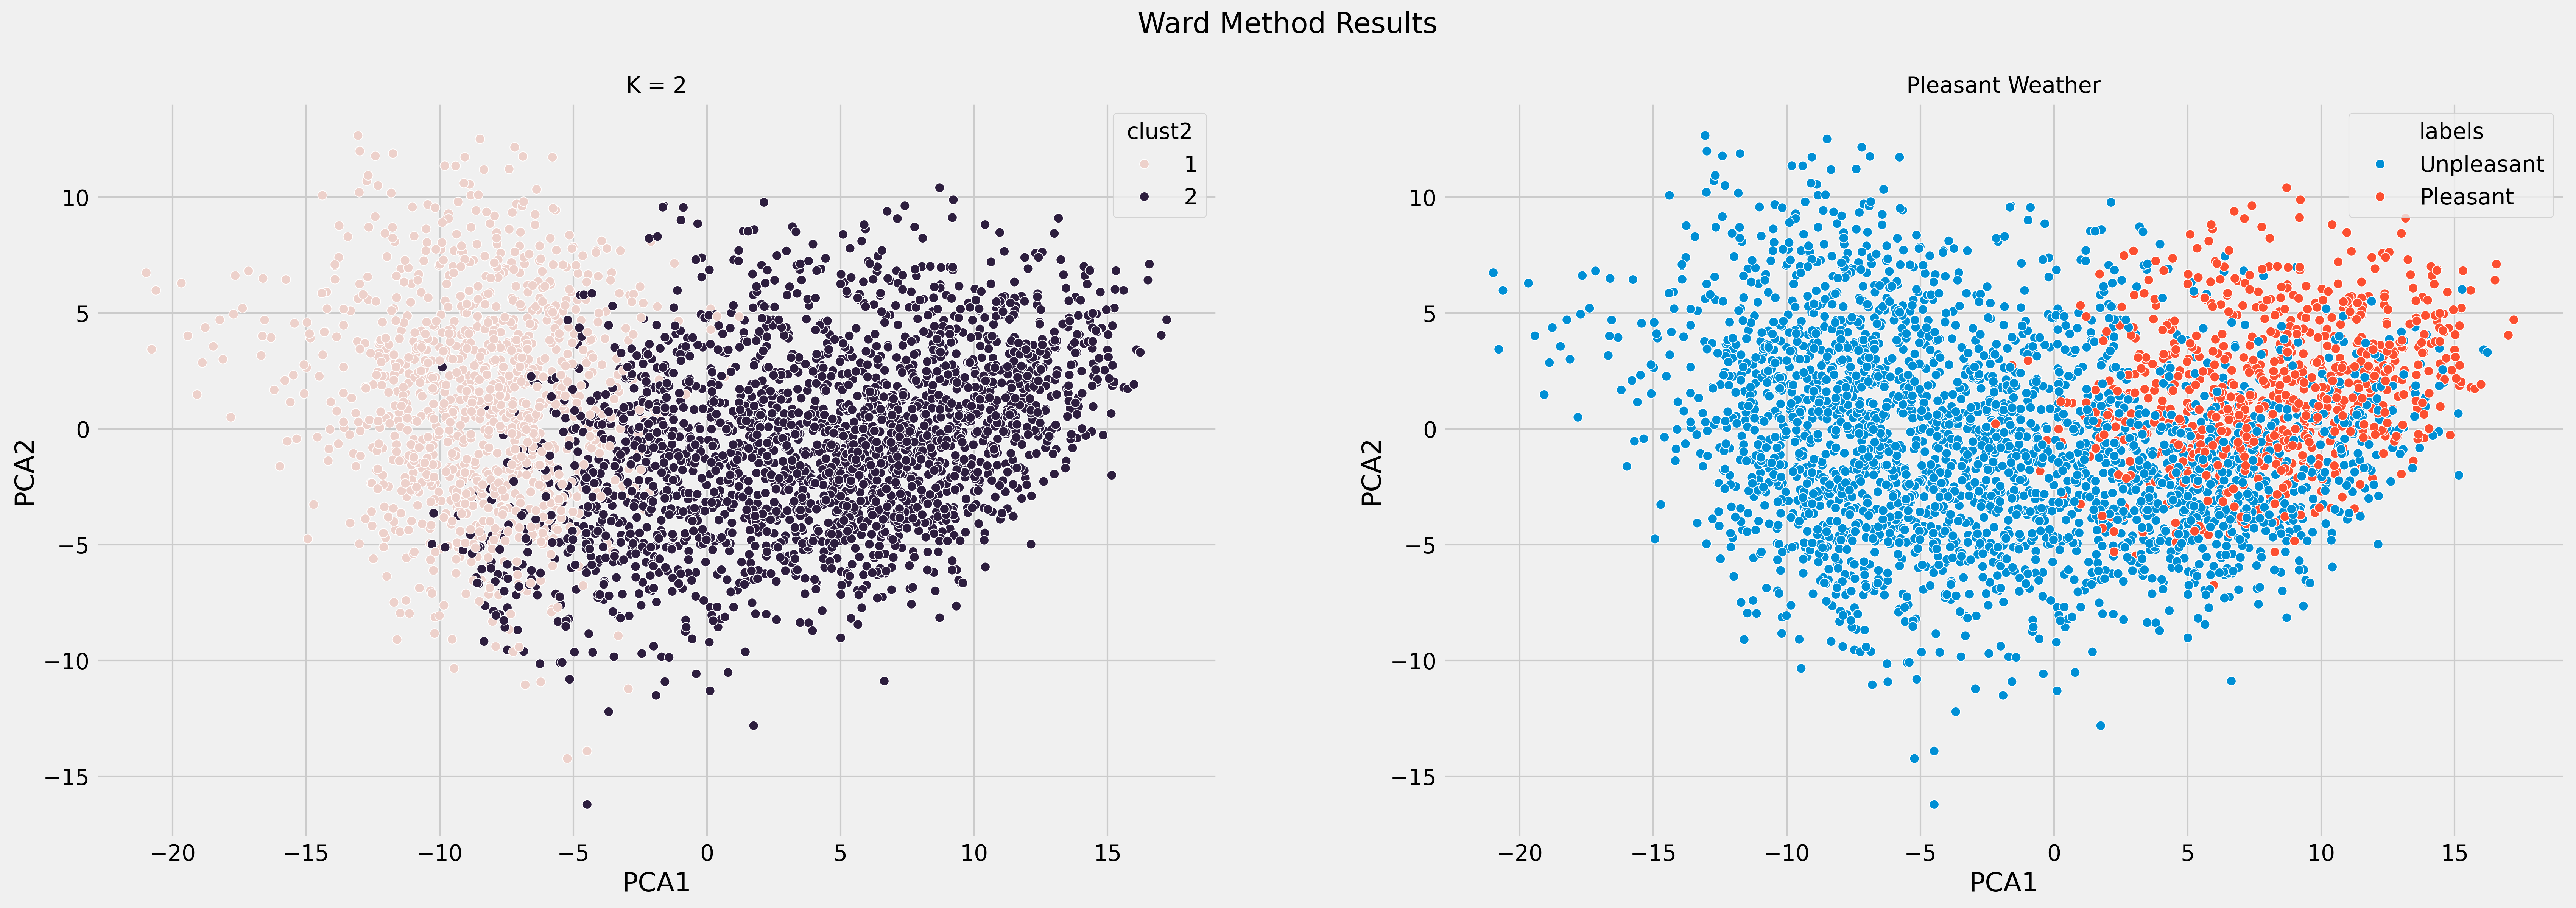

In [27]:
# LOAD PLEASANT WEATHER DATAFRAME HERE
df_pleasant = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

# Filter data to 1980s
df_pleasant = df_pleasant[df_pleasant["DATE"].astype(str).str.startswith('198')]

# New df containing a single column of pleasant weather data 
pleasant_basel = df_pleasant["BASEL_pleasant_weather"]

# New DataFrame only consisting of PCA1 and PCA 2
dfPCA_decade = df_decade[["PCA1", "PCA2"]]

dfPCA_decade['clust2']=fcluster(link, 2, criterion='maxclust')
dfPCA_decade["labels"] = pleasant_basel.values
dfPCA_decade["labels"] = dfPCA_decade["labels"].map({0: "Unpleasant", 1: "Pleasant"})

# plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Ward Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_decade, hue="clust2")

plt.subplot(1,2,2)
plt.title("Pleasant Weather",fontsize=14)
# Note: There might be a typo here - "Label" vs "labels" - check your column name
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_decade, hue="labels")